# Chapter 2. Matrics and Basic Operations

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib widget

In [3]:
X = np.arange(1,21).reshape(4,5)
print(X)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


Key trick  is thinking about matrices as smaller blocks. Going to be used a ton in higher order methods. LU / QR / Schur decomposition.

## 14. Matrix-Vector Product (Linear combos of Cols)

This si very important. It's like combining rows, combining columns, applying linar xforms. Connects matrix to geometry of vector spaces. 

So we could have scaling, reflection, rotation by $\theta$ all smoothly embedded here. 

In [4]:
A = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])  # 3×2 matrix

x = np.array([2, -1])  # 2D vector

In [5]:
y = A.dot(x)
print("A·x =", y)

A·x = [0 2 4]


In [6]:
col1 = A[:,0]   # first column
col2 = A[:,1]   # second column

manual = 2*col1 + (-1)*col2
print("Manual linear combination:", manual)


Manual linear combination: [0 2 4]


In [7]:
B = np.array([
    [2, 0],
    [0, 1]
])  # stretches x-axis by 2

v = np.array([1, 3])
print("B·v =", B.dot(v))

B·v = [2 3]


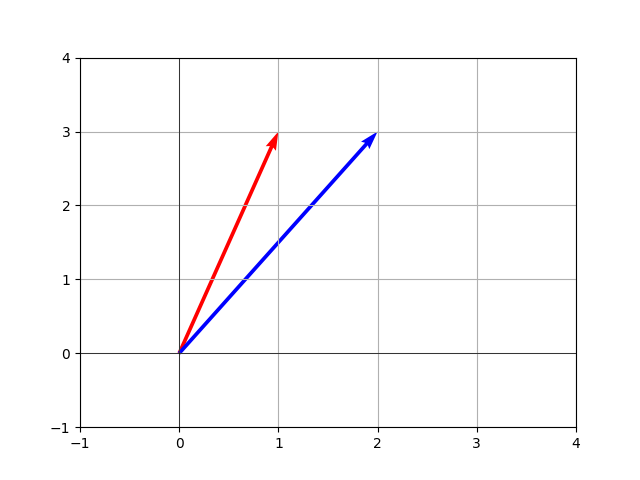

In [8]:
import matplotlib.pyplot as plt

# draw original vector
plt.quiver(0,0,v[0],v[1],angles='xy',scale_units='xy',scale=1,color='r',label='v')

# draw transformed vector
v_transformed = B.dot(v)
plt.quiver(0,0,v_transformed[0],v_transformed[1],angles='xy',scale_units='xy',scale=1,color='b',label='B·v')

plt.xlim(-1,4)
plt.ylim(-1,4)
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.grid()
plt.show()

## 15. Matrix-Matrix Product (Composition of Linear Steps)

Important to note that this is basically combining two matrices into a single new matrix. 

$$ c_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}$$

But for example, a more important takeaway is probably if $B$ rotates vecs by 90˚, and A scales vecs by 2, then AB rotates, and then scales, both in a single transformation.

Order does matter. 

If A scales, and B rotates, AB scales vectors by 2 AFTER rotating them. 

In [12]:
A = np.array([
    [1, 2],
    [3, 4]
])  # 2×2

B = np.array([
    [2, 0],
    [1, 2]
])  # 2×2

C = A.dot(B)   # or A @ B
print("A·B =\n", C)

C = A @ B
print("A @ B =\n", C)

A·B =
 [[ 4  4]
 [10  8]]
A @ B =
 [[ 4  4]
 [10  8]]


In [13]:
c11 = A[0,:].dot(B[:,0])
c12 = A[0,:].dot(B[:,1])
c21 = A[1,:].dot(B[:,0])
c22 = A[1,:].dot(B[:,1])

print("Manual C =\n", np.array([[c11,c12],[c21,c22]]))

Manual C =
 [[ 4  4]
 [10  8]]


In [14]:
v = np.array([1,1])

print("First apply B:", B.dot(v))
print("Then apply A:", A.dot(B.dot(v)))
print("Directly with C:", C.dot(v))

First apply B: [2 3]
Then apply A: [ 8 18]
Directly with C: [ 8 18]


Only thing is the inner dimensions must match!

In [15]:
M = np.array([
    [1, 0, 2],
    [0, 1, 3]
])  # 2×3

N = np.array([
    [1, 2],
    [0, 1],
    [4, 0]
])  # 3×2

P = M.dot(N)  # result is 2×2
print("M·N =\n", P)

M·N =
 [[ 9  2]
 [12  1]]


In [16]:
A = np.random.randn(3,2)
B = np.random.rand(2,4)

C = A @ B
print(C.shape)

(3, 4)


In [17]:
A = np.random.randn(3,3)
B = np.random.randn(3,3)
C = np.random.randn(3,3)

print((A@B)@C)
print(A@(B@C))

[[ 4.3207173   0.20443347  0.4290775 ]
 [-1.31298048 -2.5017063  -0.95311095]
 [ 2.96908155  5.13807001  1.36390861]]
[[ 4.3207173   0.20443347  0.4290775 ]
 [-1.31298048 -2.5017063  -0.95311095]
 [ 2.96908155  5.13807001  1.36390861]]


## 16. Identity, Inverse, Transpose 

Not going to cover identity / transpose. Inverse is just set up so $C C^{-1} = I $

NOTE!!! If a matrix is singular, i.e. determinant = 0, it has no inverse. Not all of them are invertible.

Transpose and inverse togther are interchangeable

$$ (A^T)^{-1} = (A^{-1})^{T} $$

Orthogonal matrices:

$$ Q^T Q = I $$ 

Symmetric matrices:

$$ A = A^T $$
These are always going to have orthogonal eigenvectors and real eigenvalues. 

## 17. Symmetric, Diagonal, Triangular, and Permutation Matrices

In [18]:
A = np.array([
    [2, 3, 4],
    [3, 5, 6],
    [4, 6, 8]
])

print("A:\n", A)
print("A.T:\n", A.T)
print("Is symmetric?", np.allclose(A, A.T))

A:
 [[2 3 4]
 [3 5 6]
 [4 6 8]]
A.T:
 [[2 3 4]
 [3 5 6]
 [4 6 8]]
Is symmetric? True


Diagonal matrices simply scale each coordinate separately. 

Triangular matrices...

In [19]:
U = np.array([
    [1, 2, 3],
    [0, 4, 5],
    [0, 0, 6]
])

L = np.array([
    [7, 0, 0],
    [8, 9, 0],
    [1, 2, 3]
])

print("Upper triangular U:\n", U)
print("Lower triangular L:\n", L)

Upper triangular U:
 [[1 2 3]
 [0 4 5]
 [0 0 6]]
Lower triangular L:
 [[7 0 0]
 [8 9 0]
 [1 2 3]]


Triangular matrices are important in solving linear systems. I.e. Guassian elimination. 

Permutation matrices - rearrange the order of coordinates. Interesting, I actually didn't remember this one. 

Each row and each col has exactly one, everything else is 0. 

## 18. Trace and Basic Matrix Properties

So trace is the sum of a matrices diagonal entries:

$$ tr(A) = \sum_{i} A_{ii} $$

In [20]:
A = np.array([
    [2, 1, 3],
    [0, 4, 5],
    [7, 8, 6]
])

trace_A = np.trace(A)
print("Matrix A:\n", A)
print("Trace of A =", trace_A)

Matrix A:
 [[2 1 3]
 [0 4 5]
 [7 8 6]]
Trace of A = 12


So interestingly enough trace is linear for matrices A and B. 

$$ tr(A + B) = tr(A) + tr(B) $$

Another important property is:

$$ tr(AB) = tr(BA) $$

**The trace equals the sum of eigenvalues of a matrix (counting multiplicities**

In [21]:
vals, vecs = np.linalg.eig(A)
print("Eigenvalues:", vals)
print("Sum of eigenvalues =", np.sum(vals))
print("Trace =", np.trace(A))

Eigenvalues: [12.83286783  2.13019807 -2.9630659 ]
Sum of eigenvalues = 12.000000000000007
Trace = 12


In [23]:
R = np.array([
    [0, -1],
    [1, 0]
])
vals, vecs = np.linalg.eig(R)
trace = np.trace(R)
print("Eigenvalues:", vals)
print("Sum of eigenvalues =", np.sum(vals))
print("Trace =", np.trace(R))

Eigenvalues: [0.+1.j 0.-1.j]
Sum of eigenvalues = 0j
Trace = 0


## 19. Affine Transformations and Homogenous Coordinates

Affine xforms let us do more than linear operations. 

An affine xform allows translations as well. 
Shifting every point by (2,3) is affine but not linear. 

**Homogenous coordinates idea: we add an extra coordinate (usually 1) to vectors**

In [30]:
T = np.array([
    [1, 0, 2],
    [0, 1, 3],
    [0, 0, 1]
])

p = np.array([1, 1, 1])  # point at (1,1)
p_translated = T.dot(p)

print("Original point:", p)
print("Translated point:", p_translated)

Original point: [1 1 1]
Translated point: [3 4 1]


In [31]:
R = np.array([
    [0, -1, 0],
    [1,  0, 0],
    [0,  0, 1]
])

M = T.dot(R)  # rotate then translate
print("Combined transform:\n", M)

p = np.array([1, 0, 1])
print("Rotated + translated point:", M.dot(p))

Combined transform:
 [[ 0 -1  2]
 [ 1  0  3]
 [ 0  0  1]]
Rotated + translated point: [2 4 1]


(4, 3)


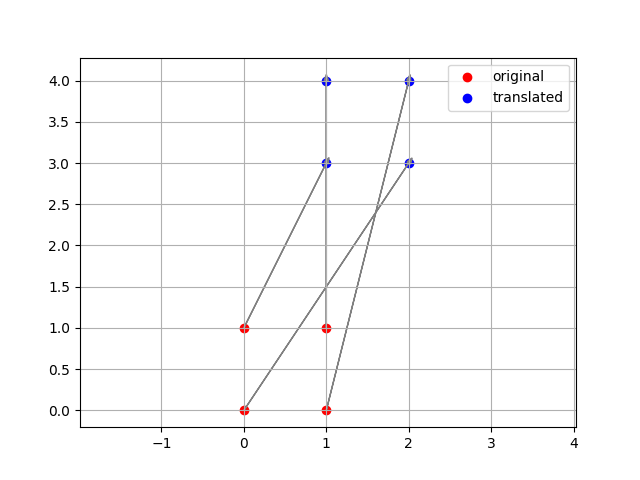

In [37]:

points = np.array([
    [0,0,1],
    [1,0,1],
    [1,1,1],
    [0,1,1]
])  # a unit square
print(points.shape)

transformed = points.dot(T.T)
transformed = points @ M.T

plt.cla()
plt.scatter(points[:,0], points[:,1], color='r', label='original')
plt.scatter(transformed[:,0], transformed[:,1], color='b', label='translated')

for i in range(len(points)):
    plt.arrow(points[i,0], points[i,1],
              transformed[i,0]-points[i,0],
              transformed[i,1]-points[i,1],
              head_width=0.05, color='gray')

plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

## 20. Computing with Matrices (Cost Counts and Simple Speedups)

Counting operations (matrix-vector multiple)

If A is an $m \times n$ matrix and $x$ is an $n$-dimensional vector, computing $A\cdot x$ takes about $m \times n$ multiplications and the same number of additions.

In [40]:
A = np.array([
    [1,2,3],
    [4,5,6]
])

# Add 10 to every entry
print("A+10 =\n", A+10)

# Multiply each row by a different scalar
scales = np.array([1,10])
print(f'{scales=}')
scales = scales[:,None]
print(f'{scales=}')
print("Row-scaled A =\n", A*scales)

A+10 =
 [[11 12 13]
 [14 15 16]]
scales=array([ 1, 10])
scales=array([[ 1],
       [10]])
Row-scaled A =
 [[ 1  2  3]
 [40 50 60]]


In [50]:
A = np.random.randn(1000,1000).astype(np.float32)  # 32-bit floats
B = np.random.randn(1000,1000).astype(np.float32)

start = time.time()
C = A.dot(B)
print("Result shape:", C.shape, "dtype:", C.dtype)
print("Time:", round(time.time()-start,3), "seconds")

A = np.random.randn(1000,1000).astype(np.float64)  # 32-bit floats
B = np.random.randn(1000,1000).astype(np.float64)

start = time.time()
C = A.dot(B)
print("Result shape:", C.shape, "dtype:", C.dtype)
print("Time:", round(time.time()-start,3), "seconds")

Result shape: (1000, 1000) dtype: float32
Time: 0.003 seconds
Result shape: (1000, 1000) dtype: float64
Time: 0.005 seconds
